In [1]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# ------------------------------
# 1. Create Realistic Housing Dataset
# ------------------------------
random.seed(42)

data = {'Size': [], 'Bedrooms': [], 'Age': [], 'Distance': [], 'Floor': [], 'Price': []}

for _ in range(80):
    size = random.randint(50, 150)
    bedrooms = random.randint(1, 5)
    age = random.randint(0, 30)
    distance = random.randint(1, 20)
    floor = random.randint(1, 10)
    price = size * 3 + bedrooms * 25 + age * 0.05 + random.randint(-40, 40)
    data['Size'].append(size)
    data['Bedrooms'].append(bedrooms)
    data['Age'].append(age)
    data['Distance'].append(distance)
    data['Floor'].append(floor)
    data['Price'].append(price)

df = pd.DataFrame(data)
print("---- Sample of Generated Dataset ----")
print(df.head(), "\n")
print(f"Dataset Shape: {df.shape}\n")


---- Sample of Generated Dataset ----
   Size  Bedrooms  Age  Distance  Floor   Price
0   131         1    0         9      4  406.00
1    67         1   21        18      2  262.05
2   104         1    0         3      4  326.00
3   114         5    0        18      4  496.00
4   103         2   14        19      5  319.70 

Dataset Shape: (80, 6)



In [3]:
# ------------------------------
# 2. Features & Target
# ------------------------------
X = df[['Size', 'Bedrooms', 'Age', 'Distance', 'Floor']]
y = df['Price']

# ------------------------------
# 3. Train-Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
print(f"Number of training samples: {X_train.shape[0]}")
print(f"Number of test samples: {X_test.shape[0]}\n")

# ------------------------------
# 4. Feature Scaling
# ------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Features scaled using StandardScaler (mean=0, std=1)\n")


Number of training samples: 56
Number of test samples: 24

Features scaled using StandardScaler (mean=0, std=1)



In [4]:
# ------------------------------
# 5. Ridge Regression
# ------------------------------
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
print("Ridge Regression trained:")
print(f"  Coefficients: {ridge.coef_}")
print(f"  Intercept: {ridge.intercept_}")
print(f"  R2 score on test set: {r2_score(y_test, y_pred_ridge):.2f}\n")

# ------------------------------
# 6. Lasso Regression
# ------------------------------
lasso = Lasso(alpha=8.0)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
print("Lasso Regression (strong regularization) shrank coefficients of low-importance features to zero:")
print(f"  Coefficients: {lasso.coef_}")
print("Features 'Age', 'Distance', and 'Floor' were effectively removed (coefficients set to 0)")
print(f"  Intercept: {lasso.intercept_}")
print(f"  R2 score on test set: {r2_score(y_test, y_pred_lasso):.2f}\n")


Ridge Regression trained:
  Coefficients: [90.73370193 30.83799142 -0.54430476  2.01341777  3.64722449]
  Intercept: 360.33750000000003
  R2 score on test set: 0.95

Lasso Regression (strong regularization) shrank coefficients of low-importance features to zero:
  Coefficients: [85.47919012 23.63804842 -0.          0.          0.        ]
Features 'Age', 'Distance', and 'Floor' were effectively removed (coefficients set to 0)
  Intercept: 360.33750000000003
  R2 score on test set: 0.94



In [5]:
# ------------------------------
# 7. Decision Tree Regressor
# ------------------------------
tree = DecisionTreeRegressor(max_depth=5, random_state=42)
tree.fit(X_train_scaled, y_train)
y_pred_tree = tree.predict(X_test_scaled)
print("Decision Tree Regressor trained:")
print("  Non-linear, branch-based predictions")
print(f"  Max depth: {tree.get_depth()}")
print(f"  Number of leaves: {tree.get_n_leaves()}")
print(f"  R2 score on test set: {r2_score(y_test, y_pred_tree):.2f}\n")


Decision Tree Regressor trained:
  Non-linear, branch-based predictions
  Max depth: 5
  Number of leaves: 22
  R2 score on test set: 0.82



---- Coefficient Comparison ----
Ridge vs Lasso coefficients indicate feature importance and effect of regularization
    Feature      Ridge      Lasso
0      Size  90.733702  85.479190
1  Bedrooms  30.837991  23.638048
2       Age  -0.544305  -0.000000
3  Distance   2.013418   0.000000
4     Floor   3.647224   0.000000 



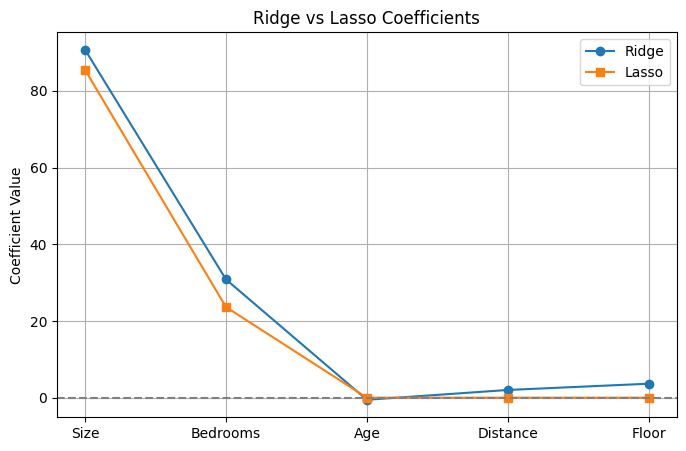

In [6]:
# ------------------------------
# 8. Coefficient Comparison (Ridge vs Lasso)
# ------------------------------
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_
})
print("---- Coefficient Comparison ----")
print("Ridge vs Lasso coefficients indicate feature importance and effect of regularization")
print(coef_df, "\n")

# ------------------------------
# 9. Plot Coefficients
# ------------------------------
plt.figure(figsize=(8,5))
plt.plot(X.columns, ridge.coef_, marker='o', label='Ridge')
plt.plot(X.columns, lasso.coef_, marker='s', label='Lasso')
plt.axhline(0, linestyle='--', color='gray')
plt.title("Ridge vs Lasso Coefficients")
plt.ylabel("Coefficient Value")
plt.legend()
plt.grid(True)
plt.show()

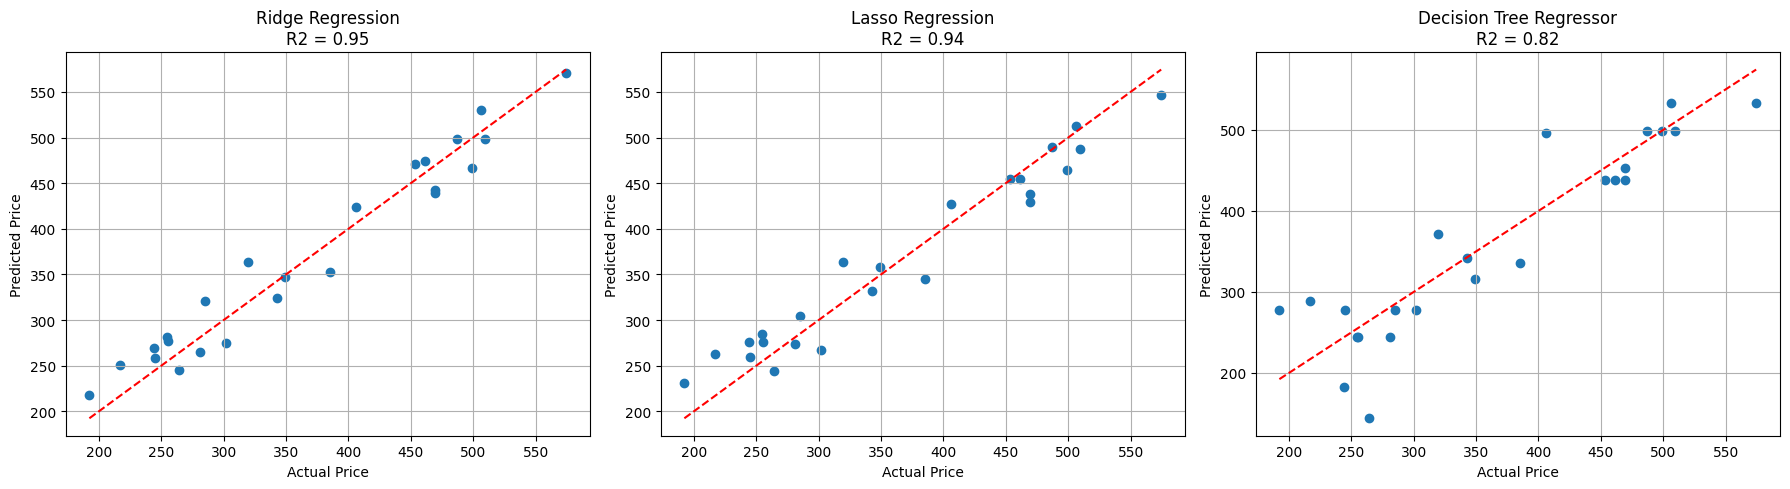

In [7]:
# ------------------------------
# 10. Model Comparison Plots (Actual vs Predicted)
# ------------------------------
plt.figure(figsize=(18,5))

# Ridge
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_ridge)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], '--', color='red')
plt.title(f"Ridge Regression\nR2 = {r2_score(y_test, y_pred_ridge):.2f}")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)

# Lasso
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_lasso)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], '--', color='red')
plt.title(f"Lasso Regression\nR2 = {r2_score(y_test, y_pred_lasso):.2f}")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)

# Decision Tree
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_tree)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], '--', color='red')
plt.title(f"Decision Tree Regressor\nR2 = {r2_score(y_test, y_pred_tree):.2f}")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)

plt.tight_layout()
plt.show()


In [9]:
print("---- Summary of Model Behavior ----")
print("1. Ridge and Lasso Regression:")
print("   - Linear models: predictions change linearly with feature values.")
print("   - Lasso (with high alpha) can shrink coefficients of low-importance features to zero, effectively performing feature selection.")
print("   - Ridge keeps all features but reduces coefficient magnitudes to prevent overfitting.")

print("\n2. Decision Tree Regressor:")
print("   - Non-linear, branch-based model: splits data into regions and predicts based on averages within leaves.")
print("   - Actual vs Predicted plot looks 'step-like' because predictions are constant within each leaf.")
print("   - Good for capturing simple non-linear relationships and easy to visualize/interpret .")


---- Summary of Model Behavior ----
1. Ridge and Lasso Regression:
   - Linear models: predictions change linearly with feature values.
   - Lasso (with high alpha) can shrink coefficients of low-importance features to zero, effectively performing feature selection.
   - Ridge keeps all features but reduces coefficient magnitudes to prevent overfitting.

2. Decision Tree Regressor:
   - Non-linear, branch-based model: splits data into regions and predicts based on averages within leaves.
   - Actual vs Predicted plot looks 'step-like' because predictions are constant within each leaf.
   - Good for capturing simple non-linear relationships and easy to visualize/interpret .
